# Dr Brooks's Exercise Data Analysis

Dr Brooks, welcome to your exercise data analysis. We have made an effort to talk to the data provided by you in a hope to understanf what it is telling us, we also hope to give you some insights and suggestions based on the analysis we have done. We also documented the process involved in the data analysis, as yourself being an expert in the field, would easily understand what we are trying to do. If you do not mind, you will be reffered as 'CB' through out the notebook

Here is what we know intially
1. CB started exercising in the summer
2. Devices used to collect data are heart rate monitor, watch, bicycle
3. Data is shared through a csv file called starva.csv

As we explore and analyse the data below are three headings to look out for.
### 1. Understanding - What we have learned from the data so far.
### 2. Consideration - Assumptions or considerations for any analysis being done
### 3. Insights - Insights we would like to provide to you.



## Intial Expolartion (Trying to understand what is in the data)

In [3]:
# importing libraries that would be usefull through out the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
#from IPython.core.display import display, HTML; display(HTML("<style>.container { width:99% !important; }</style>"))


In [4]:
# Trying to understand the data.
df = pd.read_csv('strava.csv')
df # 40649 rows 22 columns, many have NaN values.
for col in df.columns:
    print(col, df[col].unique()) # to see what unique values are present in the data.


Air Power [nan  0.  1.  2.  3.  4.  5.  6.  9.  8.  7. 10. 11. 13. 12. 15. 18. 20.
 19. 16. 14. 17. 34. 39. 40. 41. 42. 24. 23. 27. 29. 21. 22. 26. 31. 44.
 48. 45. 30. 28. 25.]
Cadence [nan  0. 76. 79. 78. 74. 75. 73. 80. 77. 81. 82. 83. 84. 72. 55. 51. 52.
 53. 69. 57. 59. 63. 67. 70. 62. 71. 68. 60. 48. 46. 49. 56. 50. 61. 58.
 29. 37. 41. 43. 85. 86. 87. 88.]
Form Power [ nan 109. 105. 116. 117. 115. 114. 112. 111. 108. 107. 113. 110. 106.
 104. 103. 102. 101. 100.  99.  98.  97.  96.  95.  94.  93.  92.  91.
  90. 118. 122.  40.  48.  50.  55.  56.  58.  64.  66.   0.  51.  63.
  77.  42.  43.  61.  60.  65.  78.  57.  87.  45.  49.  52.  83.  89.
  88.  86.  59.  72.  62.  67. 119.  54.  75.  41.  39.  44.  85.  68.
  53.  71.  30.  80.  47.  79.  33.  35.  36. 125. 121. 124. 123.]
Ground Time [  nan    0.  340.  338.  320.  306.  294.  296.  298.  302.  310.  304.
  300.  308.  314.  318.  324.  328.  326.  336.  332.  322.  288.  280.
  290.  312.  316.  292.  286.  282.  284. 

### Understanding

So entire dataframe is driven by timestamp, we know this is exercise data so the all columns are measured against a timestamp
which is measured every few seconds. So as time is one of the important factors, we separate year, month, day, hour separately to understand what is happening in an year, month, day etc. Also latitude and longtitude data are converted in to degrees.

In [5]:
def data_prep(df_given):
    df_given['timestamp']= pd.to_datetime(df_given['timestamp'])
    df_given['Year'] = df_given['timestamp'].apply(lambda x: x.year)
    df_given['Month']= df_given['timestamp'].apply(lambda x: x.month)
    df_given['Day'] = df_given['timestamp'].apply(lambda x:x.day)
    df_given['Hour']= df_given['timestamp'].apply(lambda x:x.hour)
    df_given['Week_day'] = df_given['timestamp'].dt.weekday_name
    df_given['Lat_deg'] = df_given['position_lat']*(180/2**31) # converting to degrees
    df_given['Long_deg'] = df_given['position_long']*(180/2**31) # converting to degrees
    df_given.drop(columns=['unknown_87', 'unknown_88', 'unknown_90'], inplace = True)
    return df_given

df = data_prep(df)
df

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,position_long,speed,timestamp,Year,Month,Day,Hour,Week_day,Lat_deg,Long_deg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,0.0,2019-07-08 21:04:03,2019,7,8,21,Monday,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,0.0,2019-07-08 21:04:04,2019,7,8,21,Monday,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,NaN,1316.0,2019-07-08 21:04:07,2019,7,8,21,Monday,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,-999063637.0,1866.0,2019-07-08 21:04:14,2019,7,8,21,Monday,42.281006,-83.740547
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,-999064534.0,1894.0,2019-07-08 21:04:15,2019,7,8,21,Monday,42.281043,-83.740622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,-999308618.0,NaN,2019-10-03 23:04:54,2019,10,3,23,Thursday,42.291274,-83.761081
40645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,-999309466.0,NaN,2019-10-03 23:04:56,2019,10,3,23,Thursday,42.291221,-83.761152
40646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,-999309432.0,NaN,2019-10-03 23:04:57,2019,10,3,23,Thursday,42.291193,-83.761149
40647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,activities/2925939753.fit.gz,...,-999308808.0,NaN,2019-10-03 23:05:02,2019,10,3,23,Thursday,42.291099,-83.761097


All the data is from 2019

In [4]:
pd.set_option('display.max_rows', 500) # to see more data
pd.set_option('display.max_columns', None) # to see all the columns
df_explore = df # making a copy of the dataframe
df_explore.groupby(['Month','Day','Hour']).agg(['mean','max']) # To see what hourly, daily and monthly data we have.

Air Power          Cadence        Form Power         \
                    mean   max       mean   max        mean    max   
Month Day Hour                                                       
7     8   21         NaN   NaN        NaN   NaN         NaN    NaN   
      10  23         NaN   NaN        NaN   NaN         NaN    NaN   
      12  21         NaN   NaN        NaN   NaN         NaN    NaN   
          22         NaN   NaN        NaN   NaN         NaN    NaN   
      14  17         NaN   NaN        NaN   NaN         NaN    NaN   
          18         NaN   NaN        NaN   NaN         NaN    NaN   
          20         NaN   NaN        NaN   NaN         NaN    NaN   
          21         NaN   NaN        NaN   NaN         NaN    NaN   
      16  21         NaN   NaN        NaN   NaN         NaN    NaN   
      17  23         NaN   NaN        NaN   NaN         NaN    NaN   
      18  0          NaN   NaN        NaN   NaN         NaN    NaN   
          20         NaN   NaN        NaN   NaN         NaN    NaN   
          21         NaN   NaN        NaN   NaN         NaN    NaN   
      20  14         NaN   NaN        NaN   NaN         NaN    NaN   
          15         NaN   NaN        NaN   NaN         NaN    NaN   
          21         NaN   NaN        NaN   NaN         NaN    NaN   
      21  21         NaN   NaN        NaN   NaN         NaN    NaN   
          22         NaN   NaN        NaN   NaN         NaN    NaN   
      22  21         NaN   NaN        NaN   NaN         NaN    NaN   
          22         NaN   NaN        NaN   NaN         NaN    NaN   
      23  0          NaN   NaN        NaN   NaN         NaN    NaN   
          1          NaN   NaN        NaN   NaN         NaN    NaN   
      24  23         NaN   NaN        NaN   NaN         NaN    NaN   
      25  0          NaN   NaN        NaN   NaN         NaN    NaN   
      26  20         NaN   NaN        NaN   NaN         NaN    NaN   
          21         NaN   NaN        NaN   NaN         NaN    NaN   
      27  19         NaN   NaN        NaN   NaN         NaN    NaN   
      28  18         NaN   NaN        NaN   NaN         NaN    NaN   
          19         NaN   NaN        NaN   NaN         NaN    NaN   
      29  11         NaN   NaN        NaN   NaN         NaN    NaN   
          12         NaN   NaN        NaN   NaN         NaN    NaN   
      30  19         NaN   NaN        NaN   NaN         NaN    NaN   
          20         NaN   NaN        NaN   NaN         NaN    NaN   
      31  21         NaN   NaN        NaN   NaN         NaN    NaN   
          22         NaN   NaN        NaN   NaN         NaN    NaN   
          23         NaN   NaN        NaN   NaN         NaN    NaN   
8     1   21         NaN   NaN        NaN   NaN         NaN    NaN   
      2   20         NaN   NaN        NaN   NaN         NaN    NaN   
      3   21         NaN   NaN        NaN   NaN         NaN    NaN   
          22         NaN   NaN        NaN   NaN         NaN    NaN   
      4   20         NaN   NaN        NaN   NaN         NaN    NaN   
          21         NaN   NaN        NaN   NaN         NaN    NaN   
      5   21         NaN   NaN        NaN   NaN         NaN    NaN   
          22         NaN   NaN        NaN   NaN         NaN    NaN   
      6   21         NaN   NaN        NaN   NaN         NaN    NaN   
          22         NaN   NaN        NaN   NaN         NaN    NaN   
      7   23         NaN   NaN        NaN   NaN         NaN    NaN   
      8   0          NaN   NaN        NaN   NaN         NaN    NaN   
      9   21         NaN   NaN        NaN   NaN         NaN    NaN   
      10  0          NaN   NaN        NaN   NaN         NaN    NaN   
          1          NaN   NaN        NaN   NaN         NaN    NaN   
      11  19         NaN   NaN        NaN   NaN         NaN    NaN   
          20         NaN   NaN        NaN   NaN         NaN    NaN   
      12  21         NaN   NaN        NaN   NaN         NaN    NaN   
      14  23         NaN 

### Understanding

1. Data is from July 8th to Oct 3rd. There are few days where CB has not worked out.
2. Exercise is done almost round the clock.
2. Seems like there are three parts to the data, there is the initial set which seems like running/walking with no 'Air Power', 'Leg spring stiffness' or those initial column datas, Second set also seems like running/walking data where there is no 'speed data' but has all the 'Air Power' 'leg stiffness' data. Third one again with no data in intial columns but here the mean and max distances are significantly higher so looks like it is when cycling started.

Lets plot the data to get a better picture.
What to plot:
Cadence, Airpower, Form Power, Ground Time, Leg spring stiffness, Three from these are used to gain initial insight.
Distance, Speed, Heart rate seems important to plot.
Altitude, Latitude, Longtitude are also plotted to gain understanding of the movement.

C:\Users\ankit\Anaconda3\envs\basic\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


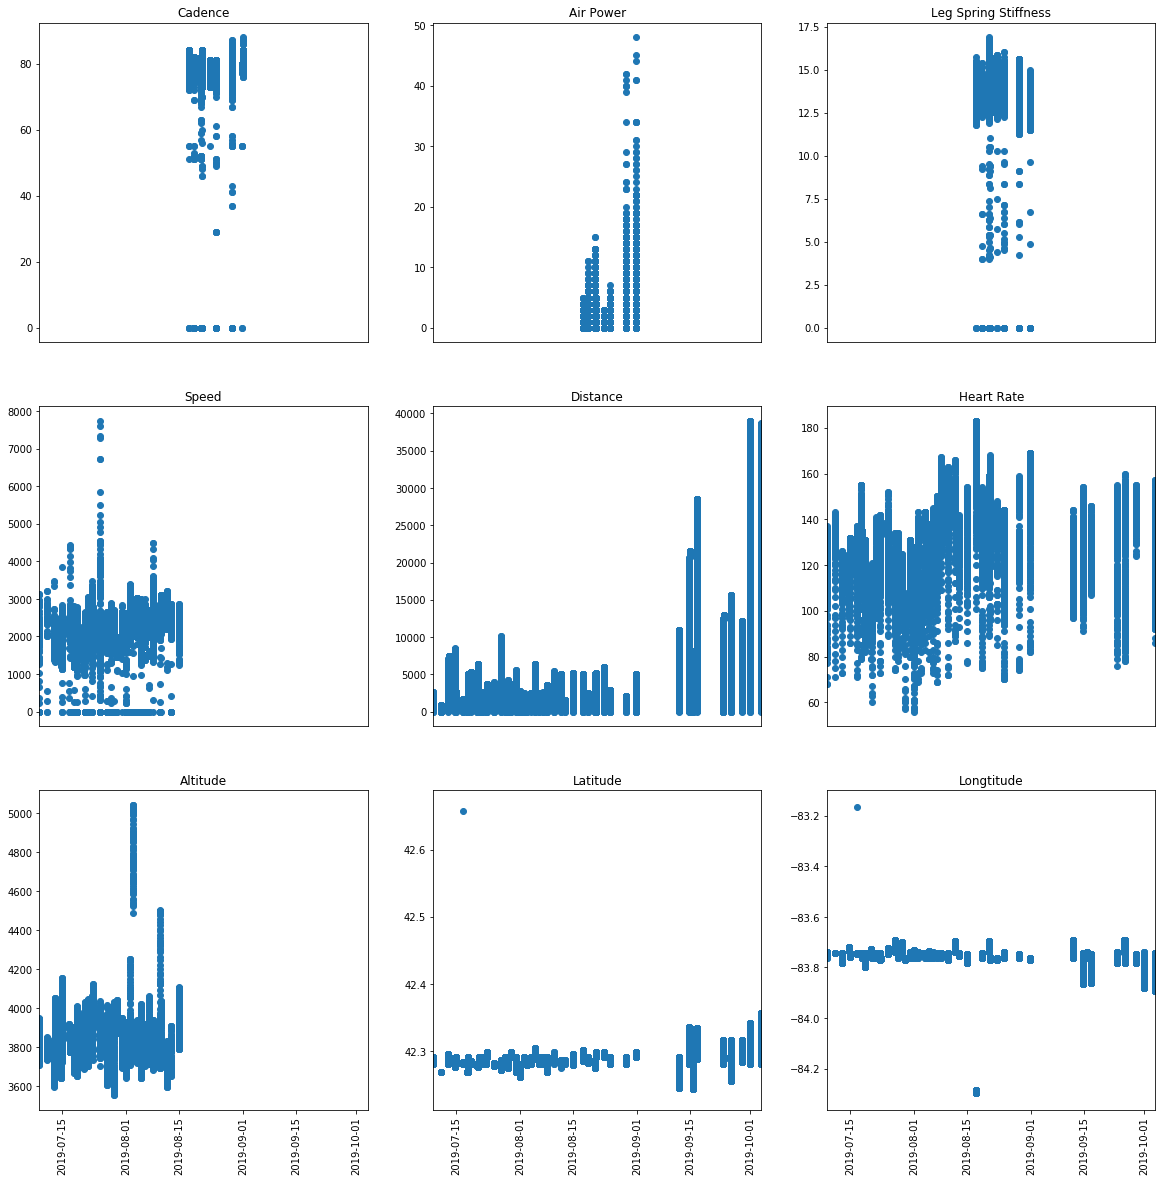

In [5]:
fig, ax = plt.subplots(3,3, figsize=(20,20))

ax[0, 0].scatter(df_explore['timestamp'], df_explore['Cadence'])
ax[0, 0].title.set_text('Cadence')
#ax[0, 0].xticks(rotation='vertical')
ax[0, 1].scatter(df_explore['timestamp'], df_explore['Air Power'])
ax[0, 1].title.set_text('Air Power')
ax[0, 2].scatter(df_explore['timestamp'], df_explore['Leg Spring Stiffness'])
ax[0, 2].title.set_text('Leg Spring Stiffness')
ax[1, 0].scatter(df_explore['timestamp'], df_explore['speed'])
ax[1, 0].title.set_text('Speed')
ax[1, 1].scatter(df_explore['timestamp'], df_explore['distance'])
ax[1, 1].title.set_text('Distance')
ax[1, 2].scatter(df_explore['timestamp'], df_explore['heart_rate'])
ax[1, 2].title.set_text('Heart Rate')
ax[2, 0].scatter(df_explore['timestamp'], df_explore['altitude'])
ax[2, 0].title.set_text('Altitude')
ax[2, 1].scatter(df_explore['timestamp'], df_explore['Lat_deg'])
ax[2, 1].title.set_text('Latitude')
ax[2, 2].scatter(df_explore['timestamp'], df_explore['Long_deg'])
ax[2, 2].title.set_text('Longtitude')
xlim = (df_explore['timestamp'].min(), df_explore['timestamp'].max())
plt.setp(ax, xlim=xlim)

for axis in fig.axes:
    plt.sca(axis)
    plt.xticks(rotation=90)

for i in range(3):
    for j in range(3):
        ax[i,j].get_xaxis().set_visible(False)
        
        if i == 2:
            ax[i,j].get_xaxis().set_visible(True)


### Understanding

Distance plot:
 1. Confirms that there is increase in distance consistently in september and hence it is safe to assume cycling started here.

Cadence, Air Power, Leg Spring Stiffness and plots:
 1. Data is only in the second half of august.
 2. Some data like Leg spring stiffness seems to be cyclic, so we could explore autocorrelation later.
 3. Infrence can be extended to other initial column data
 
Speed, Altitude plots:
 1. Data ends by the mid of august, indicating change of device for data monitoring.
 2. There is one outliner for the speed, to be explored later.
 3. There is one outliner for altitude, indicating some sort of hiking on one day, to be explored later.
 
Latitude, Longtitude plots:
 1. when cycling started, understandably there is more variation in the latitude and Longitude data
 2. Latitude and longitude have a similar outliner indicating a greater travel during that time stamp. It does not coincide with the altitude again.
 3. Longitude has another seperate outliner in mid August, Latitude is as usual. 

### Considerations

Based on the above exploration, the data is divided into three groups:
 1. Running1: Which has data on the intial running/walking data before the addition of the new device to measure leg stiffness etc. we have speed and altitude data until this point. The data is till August 14th.
 
 2. Running2: Data from August 14th onwards till end of september, the data was also recorded with the new device. Have additional data of 'Air Power', 'Cadence', 'Leg spring stiffness' etc. Running1 and 2 can be combined to have one running data as well
 
 3. Cycling: This is when cycling begins, long distances covered. Data is from September 1st onwards until the last data.
 
There is a chance that there is runnning/walking data after the start of cycling, but largely the distance covered during all of this data is high so for analysis sake, it is assumed that all the data in september belongs to cycling.
 

In [6]:
# dividing data based on above considerations.
df_cycling = df[df['Month']>8] 
df_running2 = df[(df['Month']==8) & (df['Day']>14)]
df_running1 = df[df['speed'].notnull()]
df_running =  df[df['Month']<9] # running is just the combination of running1 and running2


## Gaining insights

### Considerations

We understand that CB is an extremely busy person. So here we have tried to see how much distance CB has covered on each week day. This helps us to gain understanding on which days of the week CB is more busy, on which days CB has more time to exercise etc. So distance covered and which day of the week is combined and plotted as Violin plots. It is done for both combined running and cycling data.

In [15]:
df['distance'].max(), df_running['distance'].max(), df_cycling['distance'].max()

(39007.12, 10084.15, 39007.12)

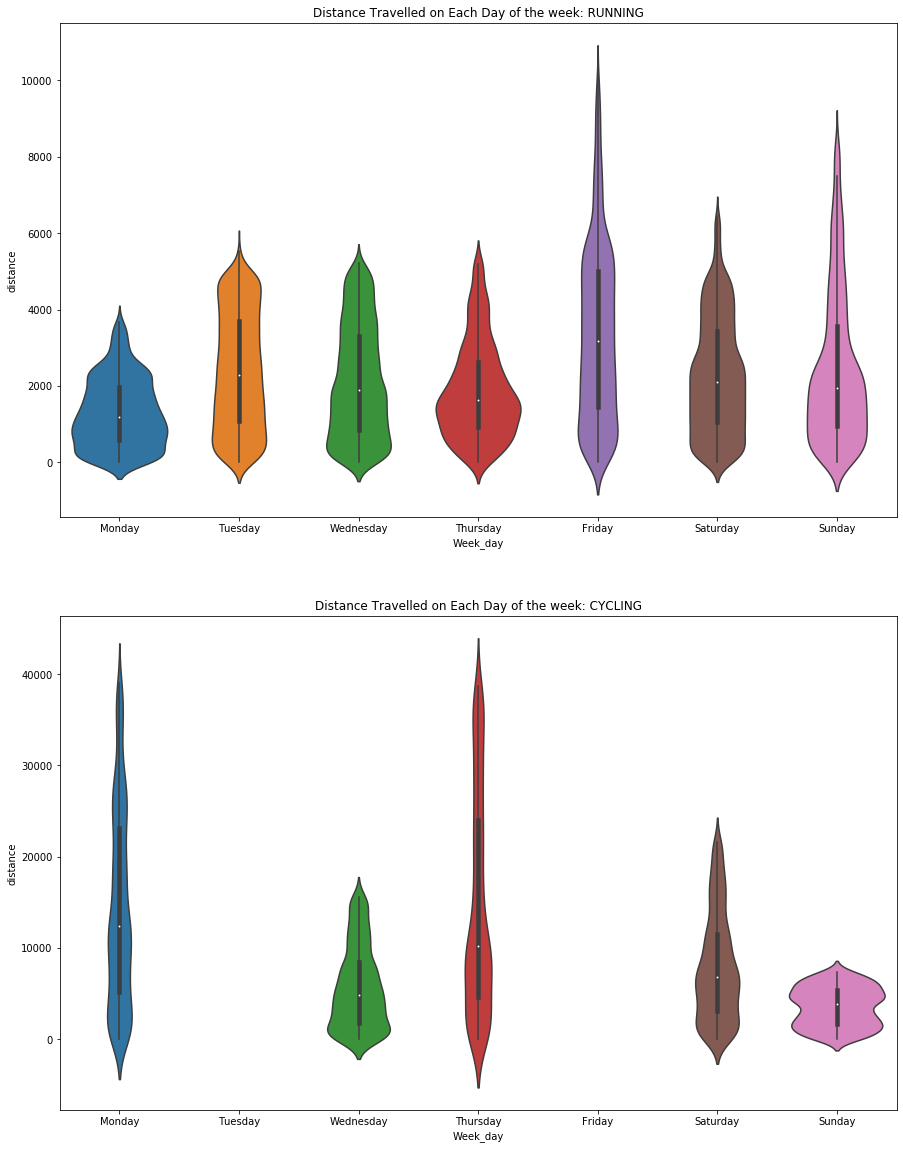

In [64]:
fig, ax = plt.subplots(2,1,figsize=(15,20))

Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.violinplot(x='Week_day', y='distance', data = df_running, ax=ax[0], order=Days)
ax[0].title.set_text('Distance Travelled on Each Day of the week: RUNNING')
sns.violinplot(x='Week_day', y='distance', data = df_cycling, ax=ax[1], order=Days)
ax[1].title.set_text('Distance Travelled on Each Day of the week: CYCLING')

### Insights

1. The running data is mostly consistent in all days with the mean being in and around 2km. This means that before september, CB had equal time on all days to spend on exercise. It is defintely good thing that there is no periodic thing/activity that happens everyweek that prevents CB from exercising on that day. Of course some adhoc works cannot be avoided. 

2. No cycling was done on Tuesdays and Fridays in over a month. The synday's plot looks more like running/walking data than cycling. So there could be activity/work that is preventing CB from exercising on those days. We would recommend if it possible, to move to the schedule you had before september which allowed you to work out everday. Minimum exercise everyday is recommended unless there is extreme workouts done everyday, then it is good to take a day off. 

So from a schedule perspective, we see that of you revert to your schedule before september, you would have enough time to excercise everyday. Let us explore from a consistancy perspective below.

### Considerations

Here we have tried to see how consistant CB is. Has he exercised everyday? what is his best streak? average workout per day. A plot with workout minutes everyday is done. Few considerations for the plot.
 1. A day is considered from 12:00 am to 12:00 am, downside of that is, on few days CB has started working out at 11 pm and gone till 2 am, this is considered on seperate days.
 2. Workout minutes total does not consider seconds, i.e. if the total work out duration is 20 minutes and 55 seconds, it is considered as 20 minutes. 

In [35]:
# To find out the total duration, the approach used to to group the data by the hour and find out the min and max time stamp
# of that hour, substracting the max from min will give the total duration of that work out in that hour and it is aggregated up
# to find the total workout minutes per day.

df_minutes = df[['timestamp', 'Month', 'Day', 'Hour']].groupby(['Month','Day','Hour']).agg(['min','max']) #Taking the time stamp
# , Month, Day , hour data and grouping it by Month Day and Hour in that order. This is important as if it was just grouped by
# the hour it would add all the workouts done at that hour in 2 months.
df_minutes.reset_index(inplace = True) # reset index.
df_minutes['Min'] = df_minutes['timestamp']['max']-df_minutes['timestamp']['min'] # finding total duration by the hour
df_minutes_agg = df_minutes[['Month', 'Day', 'Min']].groupby(['Month','Day']).agg(['sum']).reset_index() # aggregating it by
# month and day
df_minutes_agg['Minutes'] = df_minutes_agg['Min']['sum'].dt.total_seconds().div(60).astype(int) # converting everything to min
df_minutes_agg['timestamp']= pd.to_datetime('2019-'+ df_minutes_agg['Month'].astype(str)+'-'+ df_minutes_agg['Day'].astype(str))
# making timestamps using the day and month to make it easier to plot.

Text(0.5, 1.0, 'Everyday Workout Data')

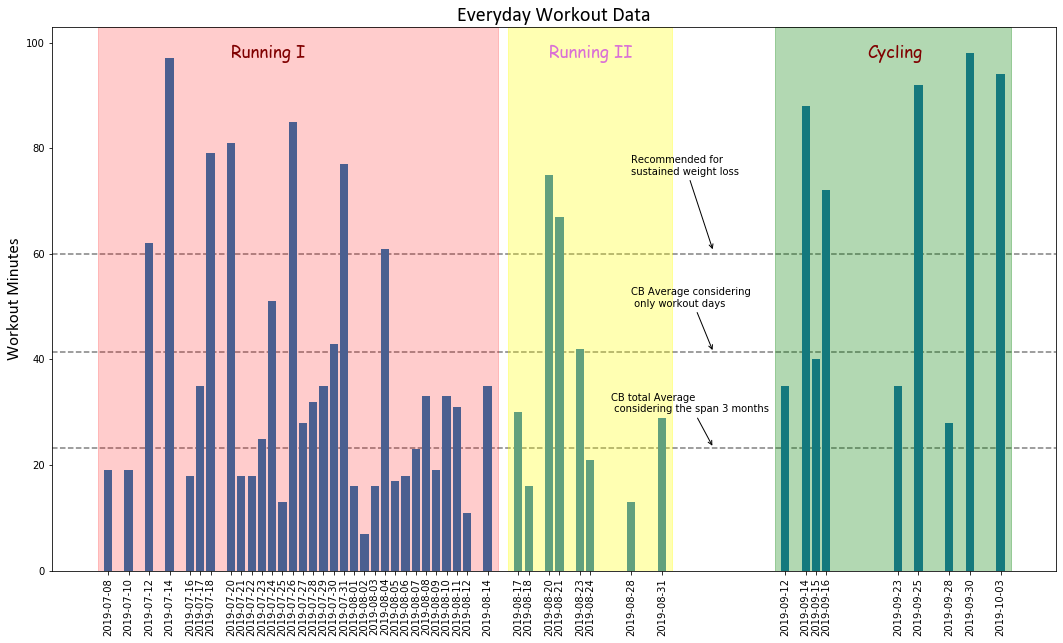

In [61]:
# PLOTTING

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(df_minutes_agg['timestamp'],df_minutes_agg['Minutes']) # bar plot of the aggregated data
mean = df_minutes_agg['Minutes'].mean() # to show the mean duration in the graph
total_days_t = df_minutes_agg['timestamp'].max()-df_minutes_agg['timestamp'].min() # total no of days considered.
total_days = total_days_t.days
rolling_mean = df_minutes_agg['Minutes'].sum()/total_days
recommended = 60 # recommneded time as per guidelines from http://www.wsupgdocs.org/family-medicine/WayneStateContentPage.aspx?nd=1571
recommended_text = 'Recommended for \nsustained weight loss'
plt.xticks(df_minutes_agg['timestamp'], rotation ='vertical');
plt.axhline(mean, color='grey', linestyle='--', zorder=0)
plt.axhline(rolling_mean, color='grey', linestyle='--', zorder=0)
plt.axhline(recommended, color='grey', linestyle='--', zorder=0)
plt.annotate('CB Average considering\n only workout days', xy = ('2019-09-05',mean), xytext=('2019-08-28',50),
             xycoords='data', arrowprops=dict(arrowstyle='->'))
plt.annotate('CB total Average\n considering the span 3 months', xy = ('2019-09-05',rolling_mean),xytext=('2019-08-26',30),
             xycoords='data', arrowprops=dict(arrowstyle='->') )
plt.annotate(recommended_text, xy = ('2019-09-05',60.5), xytext=('2019-08-28',75), xycoords='data',
            arrowprops=dict(arrowstyle='->'))

# Adding annotations

plt.annotate('Cycling',xy = ('2019-09-20',97), xycoords='data',
            color = 'maroon', fontname='Comic Sans MS', fontsize=17)
plt.annotate('Running II',xy = ('2019-08-20',97), xycoords='data',
            color = 'orchid', fontname='Comic Sans MS', fontsize=17)
plt.annotate('Running I',xy = ('2019-07-20',97), xycoords='data',
            color = 'maroon', fontname='Comic Sans MS', fontsize=17)
plt.axvspan('2019-07-07','2019-08-15', color = 'red', alpha=0.2)
plt.axvspan('2019-08-16','2019-09-01', color='yellow', alpha=0.3)
plt.axvspan('2019-09-11','2019-10-04', color='green', alpha=0.3)
plt.ylabel('Workout Minutes',fontname='Calibri', fontsize=17)
plt.title('Everyday Workout Data',fontname='Calibri', fontsize=20)

### Insights

Below are the insights from the above plot.
1. Data is available for 87 days, the average time spent on exercise over this period is 23.33 minutes. Which is good to have a normal healthy life. According to guidelines from the U.S. Department of Health and Human Services (HHS), for general health adults should aim for 22 to 42 minutes per day or 150 to 300 minutes per week.

2. The longest consecutive exercise streak was for 24 days from 20th july to 12 August. This is impressive and we recommended you revisit what went well during this period and try and pick that to have a good consistant exercises.

3. If you are aiming to reduce weight, the expectation is to have 60 minutes work out a day and need to step up if that is the objective.

4. The duration of exercise is more since the start of cycling, we recommend to continue using cycle as it is a good overall workout to the body, and you seem to like it very well.

Now, plotting the cycling data into a map to see where CB has been with his bike. We are also adding markers to indicate start and end of a workout. To be able to do that we have considered starting and ending of a datafile as the start and end of the workouts. Below is the plot.

In [65]:
# seperating the first and last the value of a datafile
df_cycling_start = df_cycling[['datafile', 'Lat_deg', 'Long_deg']].groupby('datafile').agg(['first','last'])

In [66]:
# Plotting using Folium
def location_mean(df):
    ''' Function to find the mean latitude and longitude values'''
    Latitude_mean = round(df['Lat_deg'].mean(),3)
    Longitude_mean = round(df['Long_deg'].mean(),3)
    return((Latitude_mean, Longitude_mean))

Lat_mean, Long_mean = location_mean(df_cycling)
m=folium.Map(location=[Lat_mean,Long_mean], zoom_start=12) # intial view of the map

for i in range(len(df_cycling_start)):
    # Adding markers at the start and end of each workout.
    folium.Marker([df_cycling_start["Lat_deg"]['first'].iloc[i],df_cycling_start["Long_deg"]['first'].iloc[i]],
                  popup="Start", icon=folium.Icon(color='red', icon='info-sign')).add_to(m) 
    folium.Marker([df_cycling_start['Lat_deg']['last'].iloc[i],df_cycling_start['Long_deg']['last'].iloc[i]],
                  popup="End", icon=folium.Icon(color='green', icon='info-sign')).add_to(m)

# PLotting the cycling route.
route=folium.PolyLine(locations=zip(df_cycling['Lat_deg'].dropna(),df_cycling['Long_deg'].dropna()),
                    weight=5,color='blue').add_to(m)

# Marking a circle where we think could be CB's house
folium.CircleMarker(location=[42.2912, -83.7610],
                    radius=20, popup='CB Home',
                    color='maroon',fill=True, fill_color='#3186cc').add_to(m)
display(m)



### Insights

On a lighter note

1. If we zoom into the circled location, we can see there are a lot of starts and stops happening in one place. So we are assuming this is where you live. Kindly correct us if it is wrong. The zoomed image is added below for reference.

2. We see stops made at Buffalo Wild Wings, hope it is for eating healthy wings and not cheesy burgers.



![title](CB_home.PNG)

### Summary

The summary is that you should keep the schedule as before september, where everyday you had a chance to workout and the workout style should be as done after september of this year as it included cycling and long duration of working out.

Below are the list of rules that I tried to adhere in the notebook

1. Tell a story for an audience: The notebook is to reveal what the data is trying to tell us. Throuhout the document effort is made to tell various insights

2. Document the process: Have documented how data was explored to see diffrent data. Understanding and consideration steps are noted down.

3. Use cell division to make steps clear: Have throughout the notebook used enough cells to indicate change of context, it terms of the narrative story or in terms of code.

4. Modularize code: Have used functions on various occations inorder to modularise the code.